# Medical Cost Personal Datasets
Insurance Forecast by using Linear Regression


### Content
Columns

- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
df = pd.read_csv("insurance.csv")

In [29]:
df.head(-5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733


The dataset consists of 7 columns and 1333 rows. It is plenty enough to work with the prediction. In this case I am going to work with linear regression modesl to peridict the cost of the insurane based on the input data. I will consider later what variables I can take into consideration. 

The target var in the dataset is "charges" as we need predict the price. Rest of the var are dependent variables, wchich will be used to predict independent var "charges"

In [30]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [31]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [32]:
df.describe(include=['O'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


I have numerical and categorical values in the dataset. 

By **"describe"** function I see that numerical features have normad destribution. I do not need to normalise the data. I will use visualisations technics in order to prove it. Ordinary  data such as "sex", "smoker" have 2 unique catgories and region has 4 unique categories. 

In order to perform any prediction we should transfrom the variables into numerical. 

### Missing values


In [33]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [34]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [35]:
pip install missingo

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement missingo (from versions: none)
ERROR: No matching distribution found for missingo


<AxesSubplot:>

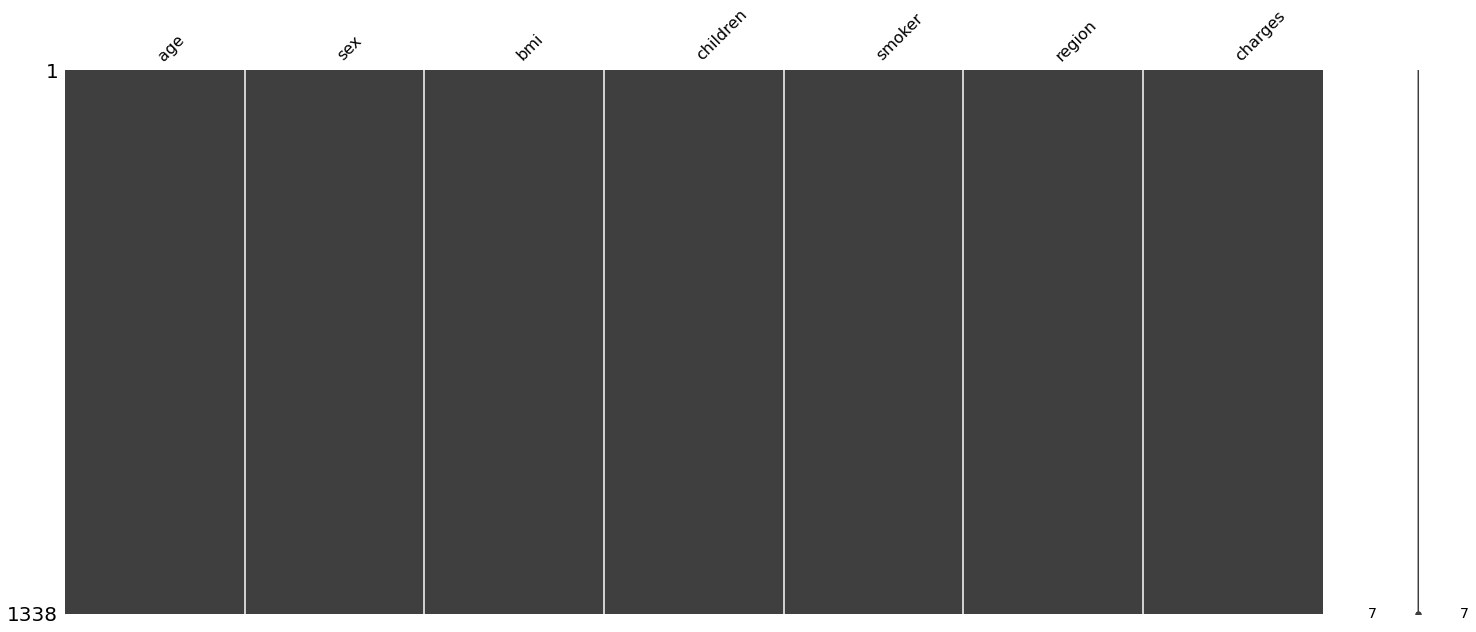

In [36]:
import missingno as msno
msno.matrix(df)

The dataframe does not have any missing values. 

# Visualisation 

- Ctegorical features 

In [37]:
import seaborn as sns

C:\Users\Windows 10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

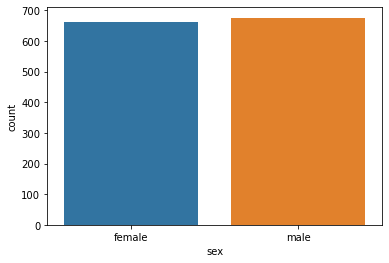

In [38]:
sns.countplot(df["sex"])

C:\Users\Windows 10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='count'>

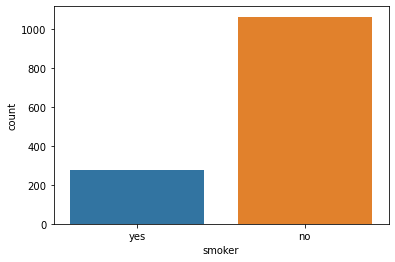

In [39]:
sns.countplot(df["smoker"])

C:\Users\Windows 10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='count'>

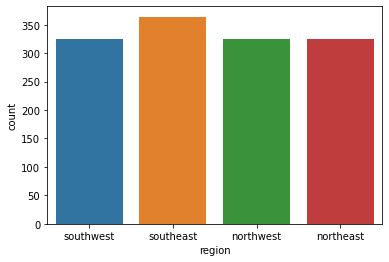

In [40]:
sns.countplot(df["region"])

C:\Users\Windows 10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children', ylabel='count'>

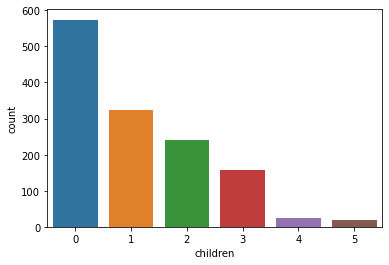

In [41]:
sns.countplot(df["children"])

- Nimerical Features 

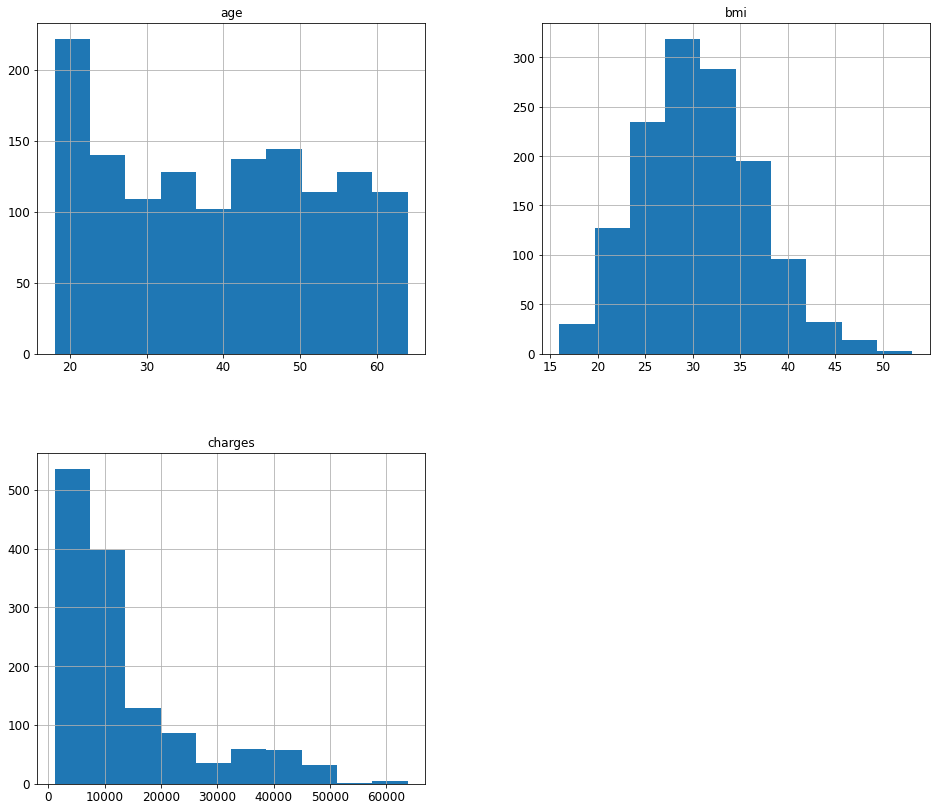

In [42]:
df_hist = df.drop(columns= ["sex", "smoker","region", "children"])
df_hist.hist(figsize=(16,14),xlabelsize=12,ylabelsize=12);

C:\Users\Windows 10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

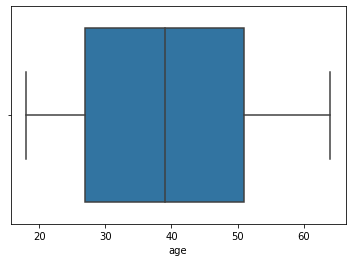

In [43]:
sns.boxplot(df["age"])

C:\Users\Windows 10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

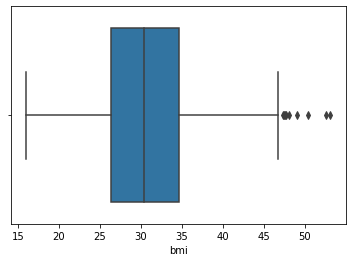

In [44]:
sns.boxplot(df["bmi"])

From the visualisation we can see that we have normal distribution for age and skweed for the bmi. I will scale the variable later on.

# Encoding
 Convert ordinal variables
I will use dummies encoding to convert the variables as they are unique.

In [45]:
df = pd.get_dummies(data=df)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [46]:
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [47]:
to_drop = ['sex_female', 'smoker_no', 'region_northwest', 'region_southwest']

In [48]:
df.drop(to_drop, axis = 1, inplace = True)

In [49]:
df.rename(columns = {'sex_male':'sex', 'smoker_yes':'smoker'}, inplace = True)

In [50]:
df.head()

,age,bmi,children,charges,sex,smoker,region_northeast,region_southeast
0,19,27.900,0,16884.92400,0,1,0,0
1,18,33.770,1,1725.55230,1,0,0,1
2,28,33.000,3,4449.46200,1,0,0,1
3,33,22.705,0,21984.47061,1,0,0,0
4,32,28.880,0,3866.85520,1,0,0,0


# Correlation 

In [51]:
df.corr()

,age,bmi,children,charges,sex,smoker,region_northeast,region_southeast
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,0.002475,-0.011642
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.138156,0.270025
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,-0.022808,-0.023066
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,0.006349,0.073982
sex,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.002425,0.017117
smoker,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,0.002811,0.068498
region_northeast,0.002475,-0.138156,-0.022808,0.006349,-0.002425,0.002811,1.000000,-0.345561
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.345561,1.000000


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_18184\4232784045.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like( df.corr(method = "pearson"), dtype=np.bool))


<AxesSubplot:>

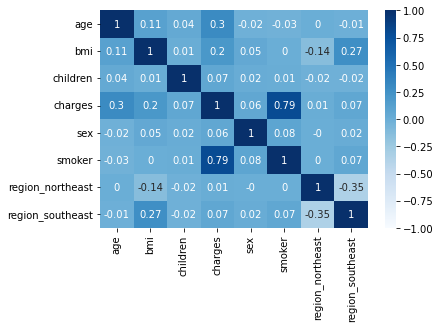

In [53]:
mask = np.triu(np.ones_like( df.corr(method = "pearson"), dtype=np.bool))
sns.heatmap(df.corr().round(2), vmin=-1, vmax=1, annot = True, cmap = 'Blues')


We do not have strong correlation between the label and the features. We only have mediarate corr between "age", "bmi" and "charges" does not give as a prove that they effect the final charges. 

### Machine Learning 

In [56]:
X = df.drop(columns = "charges")
y = df["charges"]

In [57]:
X

,age,bmi,children,sex,smoker,region_northeast,region_southeast
0,19,27.900,0,0,1,0,0
1,18,33.770,1,1,0,0,1
2,28,33.000,3,1,0,0,1
3,33,22.705,0,1,0,0,0
4,32,28.880,0,1,0,0,0
...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,0,0
1334,18,31.920,0,0,0,1,0
1335,18,36.850,0,0,0,0,1
1336,21,25.800,0,0,0,0,0


In [58]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [59]:
df.values

array([[19.  , 27.9 ,  0.  , ...,  1.  ,  0.  ,  0.  ],
       [18.  , 33.77,  1.  , ...,  0.  ,  0.  ,  1.  ],
       [28.  , 33.  ,  3.  , ...,  0.  ,  0.  ,  1.  ],
       ...,
       [18.  , 36.85,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [21.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [61.  , 29.07,  0.  , ...,  1.  ,  0.  ,  0.  ]])

# Split into Test and Train sets

In [60]:
from sklearn.model_selection import train_test_split , cross_val_score

# Slittin into Train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [61]:
print(f"X_train shape", X_train.shape)
print(f"X_test shape", X_test.shape)
print(f"y_train shape", y_train.shape)
print(f"y_train shape", y_test.shape)

X_train shape (1070, 7)
X_test shape (268, 7)
y_train shape (1070,)
y_train shape (268,)


### Normalization 
I will use standart scaler to normalise the data. I will apply for all independent var in the dataframe. 
StandardScaler follows Standard Normal Distribution (SND). 

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
# Normalizing the data 
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [94]:
print(X_train)
print(X_test)

[[-0.14853305  0.54530479  2.41394802 ...  1.97125461 -0.55071651
  -0.6155209 ]
 [-1.49780784  0.59867181 -0.89219519 ... -0.50729114 -0.55071651
   1.6246402 ]
 [-1.14273553  0.96092064  0.76087642 ...  1.97125461  1.81581628
  -0.6155209 ]
 ...
 [ 0.06451033 -0.91339361 -0.89219519 ... -0.50729114 -0.55071651
   1.6246402 ]
 [-1.42679338  0.77656186 -0.89219519 ... -0.50729114 -0.55071651
  -0.6155209 ]
 [-0.4325909  -1.97749955 -0.06565939 ... -0.50729114 -0.55071651
  -0.6155209 ]]
[[ 0.91668389 -0.08539629 -0.06565939 ... -0.50729114 -0.55071651
  -0.6155209 ]
 [ 0.56161157 -0.21962242 -0.06565939 ... -0.50729114 -0.55071651
   1.6246402 ]
 [ 0.63262604  1.59081313  0.76087642 ...  1.97125461 -0.55071651
  -0.6155209 ]
 ...
 [ 1.2717562   1.54472343 -0.89219519 ... -0.50729114  1.81581628
  -0.6155209 ]
 [-0.64563429  1.34581001  1.58741222 ...  1.97125461 -0.55071651
   1.6246402 ]
 [ 0.49059711 -0.95948331  1.58741222 ... -0.50729114  1.81581628
  -0.6155209 ]]


# Tranning the models

- Multiple Linear Regression 

In [72]:
# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [73]:
# Method to calculate the score
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv = 5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [74]:
# Calculate the mean values and Standard deviation
get_cv_scores(regressor)

CV Mean:  0.7305488739464452
STD:  0.02044398815396564




In [77]:
# Calculate the predicted values
y_pred = regressor.predict(X_test)
print(y_pred)

[11411.47006931  9496.52951662 37897.40753885 15994.16526538
  6692.42878564  3987.12269843  1589.24067105 14096.03141685
  8736.7913593   7228.66251764  4500.74845649 10022.62574762
  9043.10930349  3825.49497266 27683.6636883  10714.11223658
 11051.64227854  6092.69823229  7973.90205921 27152.98989988
 33400.03252383 14080.13296008 11740.72587262 32168.28069933
  4171.5363423   9231.47860001  1118.09879932  9789.65634234
  3794.66978374 10162.68151302  8737.60369303 40066.48294444
 15921.20667513 14110.92267278 24794.91144583  5173.98134432
 12590.72952505 31001.74583545 33285.15832461  3908.65065101
  4004.24961256  4004.30666432 30550.49232505 39232.03912057
 27814.6421439   4815.28820035 10604.06510091  7577.43460326
  3607.89883414 10237.57351807  5709.70218869  3153.35264837
 33277.50711984 38450.48707942 16040.87691831  7152.70929979
  5737.16424091  9210.12692041  8900.02890421 11481.41463797
  2104.49763957 38649.66859465 14886.98524188 12033.84627285
 14012.12031095 14275.26

In [75]:
# Calculate the intercept and coefficient
print(regressor.intercept_)
print(regressor.coef_)

13201.182056009347
[ 3.57459657e+03  2.06208153e+03  5.19968231e+02 -8.15637816e+00
  9.52779541e+03  2.18723853e+02 -1.71965149e+02]


In [80]:
# Calculating R2 value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7994037786922188

In [81]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()


,Actual,Predicted
578,9724.53000,11411.470069
610,8547.69130,9496.529517
569,45702.02235,37897.407539
1034,12950.07120,15994.165265
198,9644.25250,6692.428786


In [70]:
from sklearn import metrics

# Calculate the error values
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3921.121375147028
Mean Squared Error: 31920869.138667997
Root Mean Squared Error: 5649.855674144959


We can see tha the linear regression model prediction gives 79% of acurate prediction. 

- RandomForest Regression 

In [108]:
# Training the Random Forest Regression model on the whole dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [114]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Testing
When we have your model trained and tuned, it is time to test its final performance. Random Forest is just another Regression algorithm, so we can use all the regression metrics to assess its result.

For example, we might use MAE, MSE, MASE, RMSE, MAPE, SMAPE, and others. However, from my experience, MAE and MSE are the most commonly used. Both of them will be a good fit to evaluate the model’s performance. So, if you we them, keep in mind that the less is tge error, the better and the error of the perfect model will be equal to zero.

In [115]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred)) 

MAE:  2747.6491738339555
MSE:  21723800.2036012


In [116]:
# Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.863483910342253